# Hurwitzのゼータ函数の話

黒木玄

2019-04-01

$
\newcommand\ds{\displaystyle}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
\newcommand\Li{\operatorname{Li}}
\newcommand\QED{\text{□}}
$

Hurwitzのゼータ函数とは $\real s > 1$, $x\ne 0, -1, -2, \ldots$ で定義された

$$
\zeta(s, x) = \sum_{k=0}^\infty \frac{1}{(x+k)^s} = 
\frac{1}{x^s}+\frac{1}{(x+1)^s}+\frac{1}{(x+2)^s}+\cdots
$$

を解析接続して得られる函数のことである. 

このノートブックでは, Hurwitzのゼータ函数の $s=1-r$ ($r=1,2,3,\ldots$) における特殊値 $\zeta(1-r,x)$ と偏微分係数 $\zeta_s(1-r, x)$ に関するよく知られている結果を数値的に確認し, 関連の話を色々する. 特に伝えたいことはHurwitzのゼータ函数が色々な意味で非常に教育的な例になっていることである. 

ツイッターでの以下のスレッドも参照せよ:

* https://twitter.com/genkuroki/status/1111938896844095488

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* [WindowsへのJulia言語のインストール](http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f)

* [Julia v1.1.0 の Windows 8.1 へのインストール](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/install.ipynb)

を参照せよ. 前者は古く, 後者の方が新しい.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hurwitzのゼータ函数とBernoulli多項式の関係" data-toc-modified-id="Hurwitzのゼータ函数とBernoulli多項式の関係-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hurwitzのゼータ函数とBernoulli多項式の関係</a></span></li><li><span><a href="#Hurwitzのゼータ函数と対数ガンマ函数との関係" data-toc-modified-id="Hurwitzのゼータ函数と対数ガンマ函数との関係-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hurwitzのゼータ函数と対数ガンマ函数との関係</a></span></li><li><span><a href="#Hurwitzのゼータ函数と対数正弦函数との関係" data-toc-modified-id="Hurwitzのゼータ函数と対数正弦函数との関係-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hurwitzのゼータ函数と対数正弦函数との関係</a></span></li><li><span><a href="#周期化されたBernoulli多項式のFourier級数展開" data-toc-modified-id="周期化されたBernoulli多項式のFourier級数展開-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>周期化されたBernoulli多項式のFourier級数展開</a></span></li><li><span><a href="#Milnor型対数多重正弦函数の値のFourier級数表示" data-toc-modified-id="Milnor型対数多重正弦函数の値のFourier級数表示-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Milnor型対数多重正弦函数の値のFourier級数表示</a></span></li><li><span><a href="#以上で扱ったFourier級数に関する解説" data-toc-modified-id="以上で扱ったFourier級数に関する解説-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>以上で扱ったFourier級数に関する解説</a></span><ul class="toc-item"><li><span><a href="#概略" data-toc-modified-id="概略-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>概略</a></span></li><li><span><a href="#Milnor型対数多重正弦函数のFourier展開公式の証明" data-toc-modified-id="Milnor型対数多重正弦函数のFourier展開公式の証明-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Milnor型対数多重正弦函数のFourier展開公式の証明</a></span><ul class="toc-item"><li><span><a href="#Milnor型対数多重正弦函数の多重対数函数表示" data-toc-modified-id="Milnor型対数多重正弦函数の多重対数函数表示-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Milnor型対数多重正弦函数の多重対数函数表示</a></span></li><li><span><a href="#Milnor型対数多重正弦函数の値のFourier級数表示" data-toc-modified-id="Milnor型対数多重正弦函数の値のFourier級数表示-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Milnor型対数多重正弦函数の値のFourier級数表示</a></span></li></ul></li></ul></li><li><span><a href="#カノニカル分布との関係" data-toc-modified-id="カノニカル分布との関係-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>カノニカル分布との関係</a></span><ul class="toc-item"><li><span><a href="#カノニカル分布の定義" data-toc-modified-id="カノニカル分布の定義-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>カノニカル分布の定義</a></span><ul class="toc-item"><li><span><a href="#例:-区間上の一様分布に対するカノニカル分布" data-toc-modified-id="例:-区間上の一様分布に対するカノニカル分布-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>例: 区間上の一様分布に対するカノニカル分布</a></span></li><li><span><a href="#例:-コイン投げ分布に対するカノニカル分布" data-toc-modified-id="例:-コイン投げ分布に対するカノニカル分布-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>例: コイン投げ分布に対するカノニカル分布</a></span></li><li><span><a href="#例:-正規分布に対するカノニカル分布" data-toc-modified-id="例:-正規分布に対するカノニカル分布-7.1.3"><span class="toc-item-num">7.1.3&nbsp;&nbsp;</span>例: 正規分布に対するカノニカル分布</a></span></li><li><span><a href="#注意:-カノニカル分布の出所" data-toc-modified-id="注意:-カノニカル分布の出所-7.1.4"><span class="toc-item-num">7.1.4&nbsp;&nbsp;</span>注意: カノニカル分布の出所</a></span></li></ul></li><li><span><a href="#カノニカル分布とBernoulli多項式の一般化の関係" data-toc-modified-id="カノニカル分布とBernoulli多項式の一般化の関係-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>カノニカル分布とBernoulli多項式の一般化の関係</a></span><ul class="toc-item"><li><span><a href="#例:-区間上の一様分布に対する一般化されたBernoulli多項式-(Bernoulli多項式)" data-toc-modified-id="例:-区間上の一様分布に対する一般化されたBernoulli多項式-(Bernoulli多項式)-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>例: 区間上の一様分布に対する一般化されたBernoulli多項式 (Bernoulli多項式)</a></span></li><li><span><a href="#例:-コイン投げ分布に対する一般化されたBernoulli多項式-(Euler多項式)" data-toc-modified-id="例:-コイン投げ分布に対する一般化されたBernoulli多項式-(Euler多項式)-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>例: コイン投げ分布に対する一般化されたBernoulli多項式 (Euler多項式)</a></span></li><li><span><a href="#例:-標準正規分布に対する一般化されたBernoulli多項式-(Hermite多項式)" data-toc-modified-id="例:-標準正規分布に対する一般化されたBernoulli多項式-(Hermite多項式)-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>例: 標準正規分布に対する一般化されたBernoulli多項式 (Hermite多項式)</a></span></li></ul></li><li><span><a href="#Hurwitzのゼータ函数の移動平均" data-toc-modified-id="Hurwitzのゼータ函数の移動平均-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Hurwitzのゼータ函数の移動平均</a></span></li><li><span><a href="#多重Hurwitzゼータ函数の移動平均" data-toc-modified-id="多重Hurwitzゼータ函数の移動平均-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>多重Hurwitzゼータ函数の移動平均</a></span></li><li><span><a href="#移動平均に関する結果の一般の確率分布への自明な一般化" data-toc-modified-id="移動平均に関する結果の一般の確率分布への自明な一般化-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>移動平均に関する結果の一般の確率分布への自明な一般化</a></span><ul class="toc-item"><li><span><a href="#例:-コイン投げ分布の場合" data-toc-modified-id="例:-コイン投げ分布の場合-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span>例: コイン投げ分布の場合</a></span></li><li><span><a href="#例:-正規分布の場合" data-toc-modified-id="例:-正規分布の場合-7.5.2"><span class="toc-item-num">7.5.2&nbsp;&nbsp;</span>例: 正規分布の場合</a></span></li></ul></li><li><span><a href="#一般化された1重のHurwitz型ゼータ函数の0以下の整数での特殊値" data-toc-modified-id="一般化された1重のHurwitz型ゼータ函数の0以下の整数での特殊値-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>一般化された1重のHurwitz型ゼータ函数の0以下の整数での特殊値</a></span><ul class="toc-item"><li><span><a href="#通常のHurwitzのゼータ函数の場合" data-toc-modified-id="通常のHurwitzのゼータ函数の場合-7.6.1"><span class="toc-item-num">7.6.1&nbsp;&nbsp;</span>通常のHurwitzのゼータ函数の場合</a></span></li><li><span><a href="#一般化された1重のHurwitz型ゼータ函数の0以下の整数での特殊値" data-toc-modified-id="一般化された1重のHurwitz型ゼータ函数の0以下の整数での特殊値-7.6.2"><span class="toc-item-num">7.6.2&nbsp;&nbsp;</span>一般化された1重のHurwitz型ゼータ函数の0以下の整数での特殊値</a></span></li><li><span><a href="#例:-コイン投げ分布に対応する1重のHurwitz型ゼータ函数の特殊値" data-toc-modified-id="例:-コイン投げ分布に対応する1重のHurwitz型ゼータ函数の特殊値-7.6.3"><span class="toc-item-num">7.6.3&nbsp;&nbsp;</span>例: コイン投げ分布に対応する1重のHurwitz型ゼータ函数の特殊値</a></span></li><li><span><a href="#例:-標準正規分布に対応する1重のHurwitz型ゼータ函数の特殊値" data-toc-modified-id="例:-標準正規分布に対応する1重のHurwitz型ゼータ函数の特殊値-7.6.4"><span class="toc-item-num">7.6.4&nbsp;&nbsp;</span>例: 標準正規分布に対応する1重のHurwitz型ゼータ函数の特殊値</a></span></li></ul></li></ul></li></ul></div>

In [1]:
using Plots
gr(); ENV["PLOTS_TEST"] = "true"
gr(bglegend=RGBA(1.0, 1.0, 1.0, 0.5))
using LaTeXStrings
using SpecialFunctions
using SymPy: SymPy, sympy, @vars, oo
using QuadGK

In [2]:
?SpecialFunctions.zeta

```
zeta(s, z)
```

Generalized zeta function $\zeta(s, z)$, defined by the sum $\sum_{k=0}^\infty ((k+z)^2)^{-s/2}$, where any term with $k+z=0$ is excluded.  For $\Re z > 0$, this definition is equivalent to the Hurwitz zeta function $\sum_{k=0}^\infty (k+z)^{-s}$.   For $z=1$, it yields the Riemann zeta function $\zeta(s)$.

---

```
zeta(s)
```

Riemann zeta function $\zeta(s)$.


**注意:** Hurwitzのゼータ函数の計算では `SpecialFunctions.zeta(s,z)` を $\real z>0$ の場合にのみ利用すること.

## Hurwitzのゼータ函数とBernoulli多項式の関係

Bernoulli多項式を $B_r(x)$ と書くと, 

$$
\frac{ze^{zx}}{e^z-1} = \sum_{k=0}^\infty B_k(x)\frac{z^k}{k!}, \quad
-r\zeta(1-r, x) = B_r(x) \quad (r=1,2,\ldots).
$$

左側の公式を $B_k(x)$ の定義だと考えてよい. Bernoulli多項式については

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/13%20Euler-Maclaurin%20summation%20formula.ipynb
* https://genkuroki.github.io/documents/Calculus/13%20Euler-Maclaurin%20summation%20formula.pdf

の第1節に解説がある.

以下ではHurwitzのゼータ函数とBernoulli多項式の関係を数値的に確認しよう.

In [3]:
B(r, x) = -r*zeta(1-r, x)
Bernoulli(r, x) = sympy.bernoulli(r, x)
fBernoulli(r, x) = float(Bernoulli(r,x))
@vars x
[Bernoulli(r, x) for r in 0:4]

5-element Array{SymPy.Sym,1}:
                        1
                  x - 1/2
            x^2 - x + 1/6
      x^3 - 3*x^2/2 + x/2
 x^4 - 2*x^3 + x^2 - 1/30

In [4]:
function plot_Bernoulli(r ;
    x1=range(0.001, 1, length=400), l1=:topleft,
    x2=range(0.001, 3, length=400), l2=:topleft,
    figsize=(800, 250))

    x = x1
    P1 = plot(legend=l1, legendfontsize=9)
    plot!(x, B.(r,x),          label="\$-$r\\zeta(1-$r,x)\$", lw=2)
    plot!(x, fBernoulli.(r,x), label="\$B_{$r}(x)\$", lw=2, ls=:dash)

    x = x2
    P2 = plot(legend=l2, legendfontsize=9)
    plot!(x, B.(r,x),          label="\$-$r\\zeta(1-$r,x)\$", lw=2)
    plot!(x, fBernoulli.(r,x), label="\$B_{$r}(x)\$", lw=2, ls=:dash)

    plot(P1, P2; size=figsize)
end

plot_Bernoulli (generic function with 1 method)

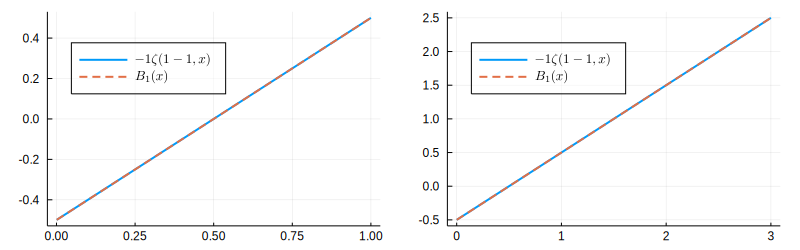

In [5]:
plot_Bernoulli(1)

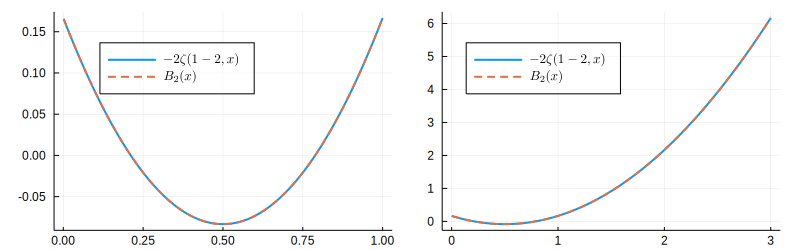

In [6]:
plot_Bernoulli(2; l1=:top)

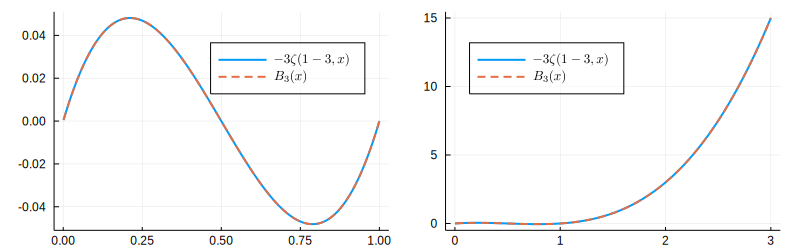

In [7]:
plot_Bernoulli(3; l1=:topright)

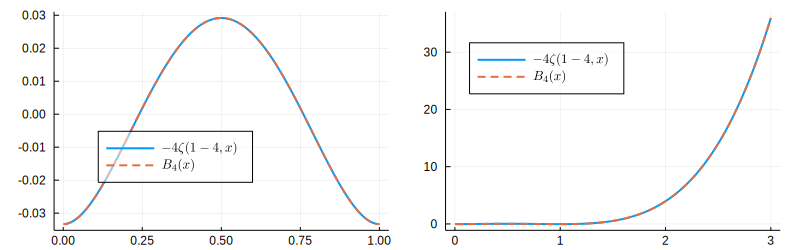

In [8]:
plot_Bernoulli(4; l1=:bottom)

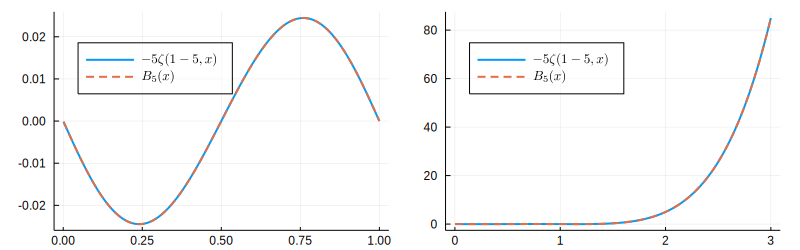

In [9]:
plot_Bernoulli(5)

ぴったり一致している.

## Hurwitzのゼータ函数と対数ガンマ函数との関係

Hurwitzのゼータ函数の $s$ に関する偏導函数を $\zeta_s(s,x)$ と書くことにする. このとき

$$
\zeta_s(0, x) = \log\Gamma(x) - \log\sqrt{2\pi} \quad (x > 0)
$$

この公式は**Lerchの定理 (レルヒの定理)**と呼ばれている. 詳しくは

* https://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/10%20Gauss%2C%20Gamma%2C%20Beta.ipynb
* https://genkuroki.github.io/documents/Calculus/10%20Gauss%2C%20Gamma%2C%20Beta.pdf

の第2.10節を参照せよ.

以下では上のLercheの定理を数値的に確認しよう.

In [10]:
logGamma(r, x; h=√eps()) = (zeta(1-r+h, x) - zeta(1-r-h, x))/(2h)
exp(logGamma(1, 10))*√(2π), gamma(10)

(362879.9877628901, 362880.0)

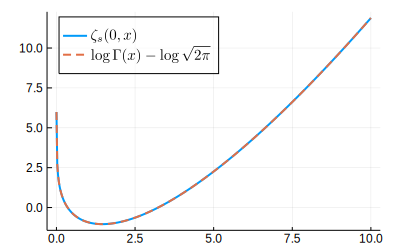

In [11]:
function plot_logGamma1(; x=range(0.001, 10, length=400), l=:topleft, figsize=(400,250))
    plot(size=figsize)
    plot!(legend=l, legendfontsize=10)
    plot!(x, logGamma.(1,x), label=L"\zeta_s(0,x)", lw=2)
    plot!(x, lgamma.(x) .- log(√(2π)), label=L"\log\Gamma(x) - \log\sqrt{2\pi}", lw=2, ls=:dash)
end

plot_logGamma1()

ぴったり一致している.

## Hurwitzのゼータ函数と対数正弦函数との関係

Hurwitzのゼータ函数とガンマ函数と $\sin$ の関係より, 

$$
\frac{\Gamma(x)}{\sqrt{2\pi}} = \exp(\zeta_s(0,x)), \quad
2\sin(\pi x) = \frac{2\pi}{\Gamma(x)\Gamma(1-x)} \quad (0<x<1)
$$

前者の公式は **Lerchの定理 (レルヒの定理)** と呼ばれ, 後者の公式は **ガンマ函数の相反公式 (reflection formula)** と呼ばれている. それらの公式の証明については, それぞれ, 

* https://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/10%20Gauss%2C%20Gamma%2C%20Beta.ipynb
* https://genkuroki.github.io/documents/Calculus/10%20Gauss%2C%20Gamma%2C%20Beta.pdf

の第2.10.1節, 第2.6.2節を参照せよ.

ゆえに, 

$$
\log(2\sin\pi x) = -\zeta_s(0,x) - \zeta_s(0,1-x) \quad (0<x<1).
$$

これの成立を数値計算で確認してみよう.

In [12]:
logsine(r,x) = -logGamma(r,x) + (-1)^r*logGamma(r,1-x)
logsine(1, 0.3), log(2sin(0.3π))

(0.481211774982512, 0.48121182505960347)

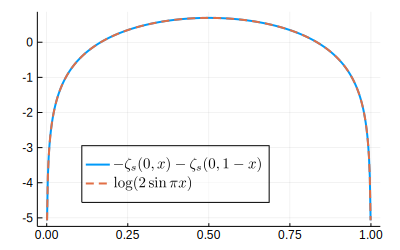

In [13]:
function plot_logsine1(; x=range(0.001, 0.999, length=400), l=:bottom, figsize=(400,250))
    plot(size=figsize)
    plot!(legend=l, legendfontsize=10)
    plot!(x, logsine.(1,x), label=L"-\zeta_s(0,x)-\zeta_s(0,1-x)", lw=2)
    plot!(x, @.(log(2sin(π*x))), label=L"\log(2\sin\pi x)", lw=2, ls=:dash)
end

plot_logsine1()

ぴったり一致している.

$\log(2\sin \pi x)$ については次が成立することも知られている:

$$
\int_0^1 \log(2\sin\pi x)\, dx = 0.
$$

この公式は次と同値である:

$$
\int_0^{\pi/2} \log(\sin x)\,dx = -\frac{\pi}{2}\log 2
$$

In [14]:
value, error = quadgk(x -> log(2sin(π*x)), 0, 1)
@show value, error;

(value, error) = (1.4675760606763788e-15, 1.9614816116706072e-16)


数値積分によっても積分の値はほぼ $0$ になっている.

## 周期化されたBernoulli多項式のFourier級数展開

Bernoulli多項式 $B_r(x)$ の $0<x<1$ における値については以下が知られている.

$r$ が偶数のとき

$$
B_r(x) = -(-1)^{r/2} 2 r! \sum_{n=1}^\infty \frac{\cos 2\pi nx}{(2\pi n)^r}
\quad (0<x<1).
$$

$r$ が奇数のとき

$$
B_r(x) = -(-1)^{(r-1)/2} 2 r! \sum_{n=1}^\infty \frac{\sin 2\pi nx}{(2\pi n)^r}
\quad (0<x<1).
$$

これらの公式の証明については

* https://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/12%20Fourier%20analysis.ipynb
* https://genkuroki.github.io/documents/Calculus/12%20Fourier%20analysis.pdf

の第6.3.3節(Hurwitzの函数等式を使った証明)または

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/13%20Euler-Maclaurin%20summation%20formula.ipynb
* https://genkuroki.github.io/documents/Calculus/13%20Euler-Maclaurin%20summation%20formula.pdf

の第1.5節(Bernoulli多項式の母函数を用いた直接的計算による証明)を参照せよ.

実数 $x$ 以下の最大の整数を $\lfloor x\rfloor$ と書く. Bernoulli多項式の周期化 $B_r(x-\lfloor x\rfloor)$ は上のようにFourier展開される. 周期化されたBernoulli多項式はEuler-Maclaurinの和公式に現われるという意味で自然な数学的対象である. 周期化されたBernoulli多項式 $B_1(x-\lfloor x\rfloor)=x-\lfloor x\rfloor-1/2$ のFourier級数展開はEuler-Maclaurinの和公式とPoissonの和公式を繋ぐ架け橋になっている. 詳しくは

* https://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/13%20Euler-Maclaurin%20summation%20formula.ipynb
* https://genkuroki.github.io/documents/Calculus/13%20Euler-Maclaurin%20summation%20formula.pdf

の第2.6節を参照せよ.

以下では上のFourier級数表示を数値的に確認しよう.

In [15]:
function FourierB(r, x; N=50)
    if iseven(r)
        -(-1)^(r÷2)    *2*gamma(r+1)*sum(cos(2π*n*x)/(2π*n)^r for n in 1:N)
    else
        -(-1)^((r-1)÷2)*2*gamma(r+1)*sum(sin(2π*n*x)/(2π*n)^r for n in 1:N)
    end
end

FourierB (generic function with 1 method)

In [16]:
function plot_FourierBernoulli(r;
    N = 50,
    x1 = range(0.001, 0.999, length=400), l1 = :topleft,
    x2 = range(0.01, 2.99, length=400),   l2 = :topleft,
    figsize = (800, 250),
    fc = :tomato)

    x = x1
    P1 = plot(legend=l1, legendfontsize=8)
    plot!(x, fBernoulli.(r,x),    label="\$B_{$r}(x)\$", lw=2)
    plot!(x, FourierB.(r,x; N=N), label="Fourier series", lw=2, ls=:dash, lc=fc)

    x = x2
    P2 = plot(legend=l2, legendfontsize=8)
    plot!(x, FourierB.(r,x; N=N), label="", lw=2, ls=:dash, lc=fc)

    plot(P1, P2, size=figsize)
end

plot_FourierBernoulli (generic function with 1 method)

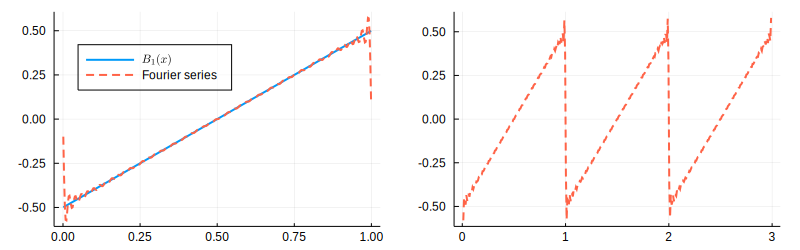

In [17]:
plot_FourierBernoulli(1)

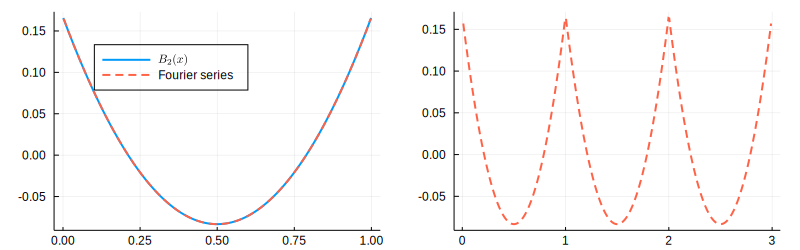

In [18]:
plot_FourierBernoulli(2; l1=:top)

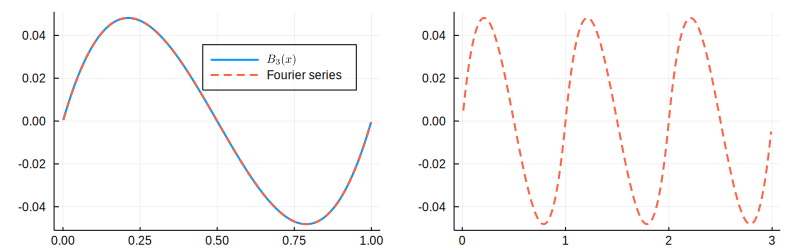

In [19]:
plot_FourierBernoulli(3; l1=:topright)

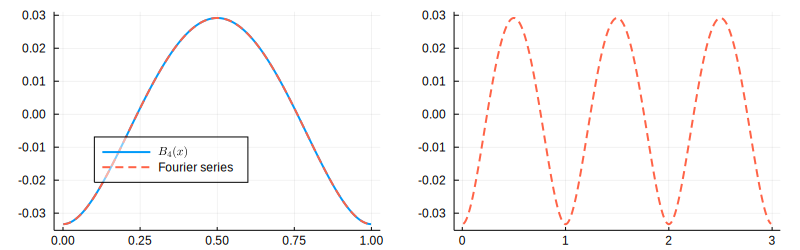

In [20]:
plot_FourierBernoulli(4; l1=:bottom)

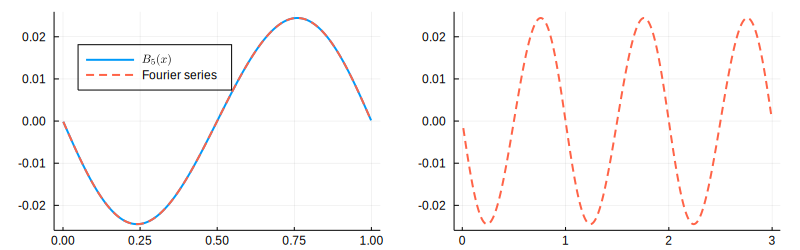

In [21]:
plot_FourierBernoulli(5)

## Milnor型対数多重正弦函数の値のFourier級数表示

**Milnor型の対数多重正弦函数** $\log S^M_r(x)$ を

$$
\log S^M_r(x) = -\zeta_s(1-r,x) + (-1)^r\zeta_s(1-r,1-x)
$$

と定義する. ここで $\zeta_s(s,x)$ はHurwitzのゼータ函数の $s$ に関する偏導函数を表す.

$\log S^M_r(x)$ の $0<x<1$ における値については以下が知られている.

$r$ が偶数のとき

$$
\log S^M_r(x) = (-1)^{r/2} 2\pi (r-1)! \sum_{n=1}^\infty \frac{\sin 2\pi nx}{(2\pi n)^r}
\quad (0<x<1).
$$

$r$ が奇数のとき

$$
\log S^M_r(x) = -(-1)^{(r-1)/2} 2\pi (r-1)! \sum_{n=1}^\infty \frac{\cos 2\pi nx}{(2\pi n)^r}
\quad (0<x<1).
$$

これらの公式の証明はこのノートの下の方に書いてある.

Milnorの原論文

* Milnor, John. On polylogarithms, Hurwitz zeta functions, and the Kubert identities. L'Enseignement Mathématique, Volume 29, 1983, 281--322. ([Volume Index](https://www.e-periodica.ch/digbib/volumes?UID=ens-001), [Article PDF](https://www.e-periodica.ch/cntmng?pid=ens-001:1983:29::101))

ではHurwitzのゼータ函数の $s$ に関する偏導函数 $\zeta_s(s,x)$ の $s=1-r$ が整数での特殊値を対数ガンマ函数の一般化とみなしている.  この論文の内容の微積分の計算で処理できる部分はそう難しくない.  このノートの読者にはここで紹介したMilnorの論文を是非とも読んでもらいたい.

以下では上のFourier級数表示を数値的に確認する.

In [22]:
function Fourierlogsine(r, x; N=50)
    if iseven(r)
         (-1)^(r÷2)    *2π*gamma(r)*sum(sin(2π*n*x)/(2π*n)^r for n in 1:N)
    else
        -(-1)^((r-1)÷2)*2π*gamma(r)*sum(cos(2π*n*x)/(2π*n)^r for n in 1:N)
    end
end

Fourierlogsine (generic function with 1 method)

In [23]:
function plot_Fourierlogsine(r;
    N = 50,
    x1 = range(0.001, 0.999, length=400), l1 = :topleft,
    x2 = range(0.01, 2.99, length=400), l2 = :topleft,
    figsize = (800, 250),
    fc = :tomato)

    x = x1
    P1 = plot(legend=l1, legendfontsize=8)
    plot!(x,        logsine.(r,x),      label="\$\\log S^M_{$r}(x)\$", lw=2)
    plot!(x, Fourierlogsine.(r,x; N=N), label="Fourier series", lw=2, ls=:dash, lc=fc)

    x = x2
    P2 = plot(legend=l2, legendfontsize=8)
    plot!(x, Fourierlogsine.(r,x; N=N), label="", lw=2, ls=:dash, lc=fc)

    plot(P1, P2, size=figsize)
end

plot_Fourierlogsine (generic function with 1 method)

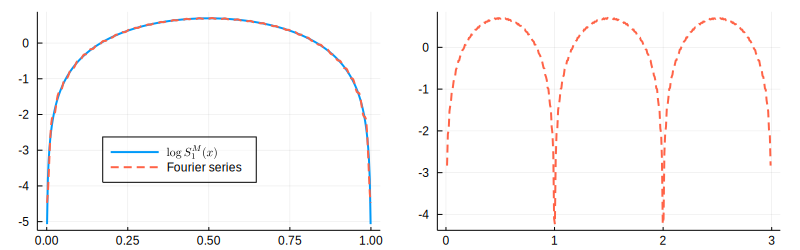

In [24]:
plot_Fourierlogsine(1; l1=:bottom)

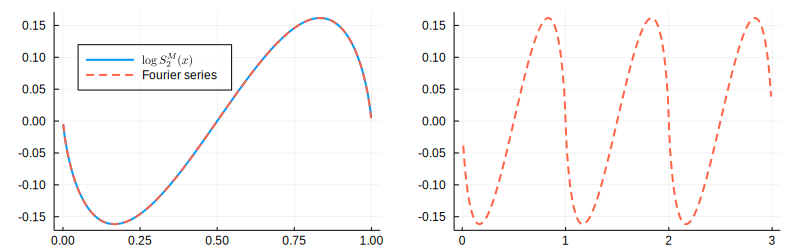

In [25]:
plot_Fourierlogsine(2)

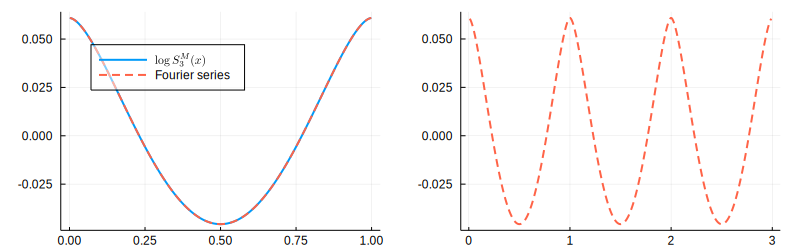

In [26]:
plot_Fourierlogsine(3; l1=:top)

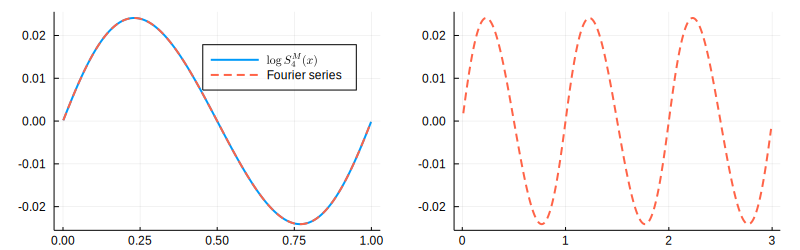

In [27]:
plot_Fourierlogsine(4; l1=:topright)

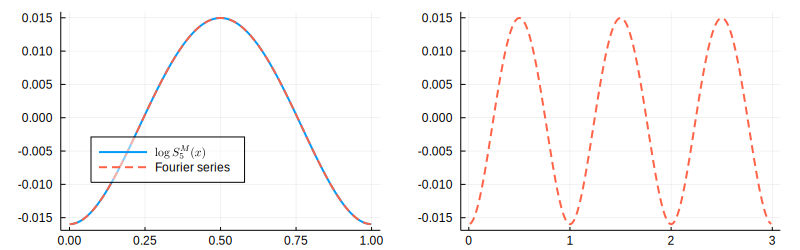

In [28]:
plot_Fourierlogsine(5; l1=:bottom)

## 以上で扱ったFourier級数に関する解説

### 概略

以上で扱ったFourier級数展開の公式は次のHurwitzの函数等式を用いて筆者自身が導出した公式である(widely known):

$$
\zeta(1-s, x) = 
\frac{\Gamma(s)}{(2\pi)^s}\left(
e^{-\pi is/2}\Li_s(e^{2\pi ix}) + e^{\pi is/2}\Li_s(e^{-2\pi ix})
\right)
\quad (\real s>0, 0<x<1).
$$

ここで $\Li_s(z)$ は **多重対数函数(polylogarithm)** である:

$$
\Li_s(z) = \sum_{n=1}^\infty \frac{z^n}{n^s}.
$$

例えば $s=1$ 重の対数函数は

$$
\Li_1(z) = \sum_{n=1}^\infty \frac{z^n}{n} = -\log(1-z) \quad (|z|<1)
$$

のように本質的に通常の対数函数になる. その多重化が polylogarithms になる.

上のような公式の導出では符号や係数の細かい部分をよく間違う.  しかし, 以下のように実際に数値計算してみて一致していることを確認できれば, 自分で導出した公式の正しさに自信を持てるようになる. 人間は証明をよく間違えるので, 可能ならば, 単に証明によって正しさを確認するだけではなく, 数値計算によってもその「正しさ」を確認しておくべきだと思う. 数値計算やその結果のプロットによって理解が深まることが多い.

Milnor型の多重対数正弦函数に関する公式を得るためには, Hurwitzの函数等式の両辺を $s$ で偏微分して, $s$ に $0$ 以下の整数 $1-r$ を代入する必要がある.  Milnor型の多重対数正弦函数に関する公式を得るために $-\zeta(1-r,x)$ と $(-1)^r\zeta(1-r,1-x)$ の和を計算すると, 符号 $(-1)^r$ をうまく働いて複雑な項がすべてキャンセルして消えて, 上で言及したシンプルな公式が得られるという仕組みになっている. (詳しくはこのノートの下の方を見よ.)

上のHurwitzの函数等式の導出のラフな解説が

* https://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/12%20Fourier%20analysis.ipynb
* https://genkuroki.github.io/documents/Calculus/12%20Fourier%20analysis.pdf

の第6.3節にある. そこでは, Hurwitzのゼータ函数と多重対数函数の両方の一般化になっているLerchの超越函数(レルヒの超越函数)

$$
L(\tau, x, s) = \sum_{k=0}^\infty \frac{e^{2\pi ix}}{(x+k)^s}
$$

を扱っている. Hurwitzの函数等式ではHurwitzのゼータ函数以外に多重対数函数も必要になるが, Lerchの超越函数であればその範囲内で $s\leftrightarrow 1-s$ に関する函数等式を閉じた形で書ける.

### Milnor型対数多重正弦函数のFourier展開公式の証明

Milnor型の対数多重正弦函数 $\log S^M_r(x)$ は

$$
\log S^M_r(x) = -\zeta_s(1-r,x) + (-1)^r\zeta_s(1-r,1-x)
$$

と定義されたのであった. 

#### Milnor型対数多重正弦函数の多重対数函数表示

**定理:** $0<x<1$, $r=1,2,3,\ldots$ のとき,

$$
\log S^M_r(x) = 
-\pi i \frac{(r-1)!}{(2\pi i)^r}
\left(\Li_r(e^{2\pi ix}) - (-1)^r\Li_r(e^{-2\pi ix})\right).
$$

**注意:** 次の結果と比較せよ: $0<x<1$, $r=1,2,3,\ldots$ のとき,

$$
\zeta(1-r,x) =
\frac{(r-1)!}{(2\pi i)^r}
\left(\Li_r(e^{2\pi ix}) + (-1)^r\Li_r(e^{-2\pi ix})\right) =
(r-1)!\sum_{n\ne 0}\frac{e^{2\pi inx}}{(2\pi i)^r}.
$$

真ん中の符号の違いに注目せよ.

**上の定理の証明:** このノートではHurwitzのゼータ函数の函数等式

$$
\zeta(1-s, x) = 
\frac{\Gamma(s)}{(2\pi)^s}
\left(e^{-\pi is/2}\Li_s(e^{2\pi ix}) + e^{\pi is/2}\Li_s(e^{-2\pi ix})\right)
\quad (s>0, 0<x<1).
$$

を認めて使うことにする. この公式の両辺を $s$ で偏微分すると, $\Gamma'(s)=\Gamma(s)\psi(s)$ (digamma函数 $\psi(s)$ の定義)と $d(2\pi)^{-s}/ds = (2\pi)^{-s}(-\log(2\pi))$ より, $f(s,z)=\partial\Li_s(z)/\partial s$ とおくと,  $0<x<1$ のとき,

$$
\begin{aligned}
-\zeta_s(1-s, x) &=
\frac{\Gamma(s)}{(2\pi)^s}
(\psi(s)-\log(2\pi))
\left(e^{-\pi is/2}\Li_s(e^{2\pi ix}) + e^{\pi is/2}\Li_s(e^{-2\pi ix})\right)
\\ &\,+
\frac{\Gamma(s)}{(2\pi)^s}
\left(e^{-\pi is/2}f(s,e^{2\pi ix}) + e^{\pi is/2}f(s,e^{-2\pi ix})\right)
\\ &\,+
\frac{\Gamma(s)}{(2\pi)^s}
\left(-\frac{\pi i}{2}e^{-\pi is/2}\Li_s(e^{2\pi ix}) + \frac{\pi i}{2}e^{\pi is/2}\Li_s(e^{-2\pi ix})\right).
\end{aligned}
$$

ゆえに, $0<x<1$, $r=1,2,3,\ldots$ について,

$$
\begin{aligned}
-\zeta_s(1-r, x) &=
\frac{(r-1)!}{(2\pi i)^r}
(\psi(r)-\log(2\pi))
\left(\Li_r(e^{2\pi ix}) + (-1)^r\Li_r(e^{-2\pi ix})\right)
\\ &\,+
\frac{(r-1)!}{(2\pi i)^r}
\left(f(r,e^{2\pi ix}) + (-1)^r(r,e^{-2\pi ix})\right)
\\ &\,-\frac{\pi i}{2}
\frac{(r-1)!}{(2\pi i)^r}
\left(\Li_s(e^{2\pi ix}) - (-1)^r\Li_s(e^{-2\pi ix})\right).
\end{aligned}
$$

さらに, $0<x<1$ のとき, $0<1-x<1$ でもあるので, 

$$
\begin{aligned}
-\zeta_s(1-r, x) &=
\frac{(r-1)!}{(2\pi i)^r}
(\psi(r)-\log(2\pi))
\left(\Li_r(e^{-2\pi ix}) + (-1)^r\Li_r(e^{2\pi ix})\right)
\\ &\,+
\frac{(r-1)!}{(2\pi i)^r}
\left(f(r,e^{-2\pi ix}) + (-1)^r(r,e^{2\pi ix})\right)
\\ &\,-\frac{\pi i}{2}
\frac{(r-1)!}{(2\pi i)^r}
\left(\Li_s(e^{-2\pi ix}) - (-1)^r\Li_s(e^{2\pi ix})\right).
\end{aligned}
$$

後者に $(-1)^r$ をかけて前者から引くと, それぞれの1段目と2段目の項はキャンセルして消え, 前者の3段目の項の2倍が残る:

$$
-\zeta(1-r,x)+(-1)^r\zeta(1-r,1-x) =
-\pi i
\frac{(r-1)!}{(2\pi i)^r}
\left(\Li_s(e^{-2\pi ix}) - (-1)^r\Li_s(e^{2\pi ix})\right).
$$

これの左辺は $\log S^N_r(x)$ の定義式なので示すべきことが示された. $\QED$

#### Milnor型対数多重正弦函数の値のFourier級数表示

**系:** $r$ が正の偶数のとき

$$
\log S^M_r(x) = (-1)^{r/2} 2\pi (r-1)! \sum_{n=1}^\infty \frac{\sin 2\pi nx}{(2\pi n)^r}
\quad (0<x<1).
$$

$r$ が正の奇数のとき

$$
\log S^M_r(x) = -(-1)^{(r-1)/2} 2\pi (r-1)! \sum_{n=1}^\infty \frac{\cos 2\pi nx}{(2\pi n)^r}
\quad (0<x<1).
$$

**注意:** 上の結果を以下の結果と比較せよ: $r$ が正の偶数のとき

$$
B_r(x) = -(-1)^{r/2} 2 r! \sum_{n=1}^\infty \frac{\cos 2\pi nx}{(2\pi n)^r}
\quad (0<x<1).
$$

$r$ が正の奇数のとき

$$
B_r(x) = -(-1)^{(r-1)/2} 2 r! \sum_{n=1}^\infty \frac{\sin 2\pi nx}{(2\pi n)^r}
\quad (0<x<1).
$$

$r$ が偶数のとき, 上では $\sin$ だったが, こちらでは $\cos$ になっており, $r$ が奇数のとき, 上では $\cos$ だったが, こちらでは $\sin$ になっている. したがって, Bernoulli多項式の $0<x<1$ での値とMilnor型対数多重正弦函数の $0<x<1$ での値を合わせると, $r=1,2,3,\ldots$ に対する

$$
\sum_{n=1}^\infty \frac{\cos(2\pi nx)}{n^r}, \quad
\sum_{n=1}^\infty \frac{\sin(2\pi nx)}{n^r}
$$

の形のFourier級数のすべてが出て来ることがわかる. 要するにHurwitzのゼータ函数は $s$ を0以下の整数の場合の値と偏微分係数の形でこれらのFourier級数をすべて含んでいるとみなされる.  これらのFourier級数はFourier級数の例として基本的である.  この意味でFourier級数論という観点から見ても, Hurwitzのゼータ函数は教育的な例になっていると考えられる.

**上の系の証明:** $0<x<1$, $r=1,2,3,\ldots$ と仮定する. 上の定理で

$$
\log S^M_r(x) = 
-\pi i \frac{(r-1)!}{(2\pi i)^r}
\left(\Li_r(e^{2\pi ix}) - (-1)^r\Li_r(e^{-2\pi ix})\right)
$$

を示した. 多重対数函数は $\displaystyle\Li_r(z)=\sum_{n=1}^\infty\frac{z^n}{n^r}$ と定義されたのであった.

$r$ が偶数のとき,

$$
\begin{aligned}
\log S^M_r(x) &=
-\pi i \frac{(r-1)!}{(2\pi)^r(-1)^{r/2}}
\sum_{n=1}^\infty \frac{e^{2\pi ix}-e^{-2\pi ix}}{n^r} 
\\ &=
-\pi i \frac{(r-1)!}{(2\pi)^r(-1)^{r/2}}
\sum_{n=1}^\infty \frac{2i\sin(2\pi nx)}{n^r}
\\ &=
(-1)^{r/2} 2\pi (r-1)! \sum_{n=1}^\infty\frac{\sin(2\pi nx)}{(2\pi n)^r}.
\end{aligned}
$$

$r$ が奇数のとき, 

$$
\begin{aligned}
\log S^M_r(x) &=
-\pi \frac{(r-1)!}{(2\pi)^r(-1)^{(r-1)/2}}
\sum_{n=1}^\infty \frac{e^{2\pi ix}+e^{-2\pi ix}}{n^r} 
\\ &=
-\pi \frac{(r-1)!}{(2\pi)^r(-1)^{(r-1)/2}}
\sum_{n=1}^\infty \frac{2\cos(2\pi nx)}{n^r}
\\ &=
-(-1)^{(r-1)/2} 2\pi (r-1)! \sum_{n=1}^\infty\frac{\cos(2\pi nx)}{(2\pi n)^r}.
\end{aligned}
$$

これで示すべきことが示された. $\QED$

## カノニカル分布との関係

### カノニカル分布の定義

$p(x)$ は $\R$ 上の確率密度函数 (値が $0$ 以上で積分が $1$ になる函数) であるとする. このノートでは確率密度函数 $p(x)$ を密度函数と呼んだり, 確率分布と呼んだり, 単に分布と呼んだりする.

確率分布 $p(x)$ に対して, 

$$
Z(\beta) = \int_\R e^{-\beta x} p(x)\,dx
$$

を(統計力学における) **分配函数 (partition function)** と呼ぶ(右辺の積分が収束するような $\beta$ のみを考える). 分配函数は確率密度函数で定まる確率分布に関する $e^{-\beta x}$ の平均値であり, 確率論では **モーメント母函数 (moment genetating function)** と呼ばれる.  さらに, 

$$
p(x|\beta) = \frac{e^{-\beta x}p(x)}{Z(\beta)}
$$

で定義される $\R$ 上の確率密度函数を確率分布 $p(x)$ に対する **カノニカル分布 (canonical distribution)** と呼ぶ.  カノニカル分布は $e^{-\beta x}p(x)$ の定数分の1であるような確率密度函数のことであり, その定数分の1の規格化因子が分配函数である. パラメーター $\beta$ は**逆温度**と呼ばれる. (逆温度は絶対温度の逆数だと解釈される.)

カノニカル分布 $p(x|\beta)$ は $\beta=0$ (絶対温度無限大) でもとの分布 $p(x)$ に戻る.  カノニカル分布はもとの分布の逆温度 $\beta$ による変形になっている.

#### 例: 区間上の一様分布に対するカノニカル分布

$\omega>0$ であるとする. $0\leqq x\leqq \omega$ のとき $p(x)=1/\omega$ で, それ以外のとき $p(x)=0$ のとき (すなわち $p(x)$ が区間 $[0,\omega]$ 上の一様分布のとき),

$$
\begin{aligned}
&
Z(\beta) = \frac{1}{\omega}\int_0^\omega e^{-\beta x}\,dx =
\frac{1}{\omega}\left[\frac{e^{-\beta x}}{-\beta}\right]_0^\omega =
\frac{1-e^{\beta\omega}}{\beta\omega},
\\ &
p(x|\beta) =
\begin{cases}
\dfrac{\beta\omega e^{-\beta x}}{1-e^{-\beta\omega}} & (0\leqq x\leqq \omega) \\
0 & (\text{otherwise}).
\end{cases}
\end{aligned}
$$

#### 例: コイン投げ分布に対するカノニカル分布

Diracの超函数を $\delta(x)$ と書く. そのとき $\delta(x)\,dx$ は確率測度になる. $p(x) = \frac{1}{2}(\delta(x)+\delta(x-\omega))$ のとき($\{0,\omega\}$ への公平なコイン投げの分布の場合には), 

$$
\begin{aligned}
&
Z(\beta) = 
\frac{1}{2}\int_\R e^{-\beta x}(\delta(x)+\delta(x-\omega))\,dx =
\frac{1+e^{-\beta\omega}}{2},
\\ &
\frac{e^{-\beta x}}{Z(\beta)} =
\frac{2e^{-\beta x}}{1+e^{-\beta\omega}},
\\ &
p(x|\beta) = 
\frac{1}{1+e^{-\beta\omega}}\delta(x) + 
\frac{e^{-\beta\omega}}{1+e^{-\beta\omega}}\delta(x-\omega).
\end{aligned}
$$

ここで $\varphi(x)\delta(x-a)=\varphi(a)\delta(x-a)$ を使った.

#### 例: 正規分布に対するカノニカル分布

$\sigma>0$ であるとする. $\ds p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-x^2/(2\sigma^2)}$ (平均0の正規分布)のとき, 

$$
\begin{aligned}
&
Z(\beta) = \frac{1}{\sqrt{2\pi\sigma^2}}\int_\R e^{-x^2/(2\sigma^2)-\beta x}\,dx = 
e^{\beta^2\sigma^2/2},
\\ &
p(x|\beta) = 
\frac{1}{\sqrt{2\pi\sigma^2}} \frac{e^{-x^2/(2\sigma^2)-\beta x}}{e^{\beta^2\sigma^2/2}} =
\frac{1}{\sqrt{2\pi\sigma^2}} e^{-(x+\beta\sigma^2)^2/(2\sigma^2)}.
\end{aligned}
$$

#### 注意: カノニカル分布の出所

確率分布 $p(x)$ に従う独立試行で得られる乱数列 $X_1,X_2,\ldots,X_n$ (独立同分布確率変数列, i.i.d.)にサンプル平均 $(X_1+\cdots+X_n)/n$ が一定の値 $a$ になるという制限を付けて, $n\to\infty$ としたとき自然に得らえる確率分布が確率分布 $p(x)$ に対するカノニカル分布である. 逆温度 $\beta$ は

$$
\int_\R x p(x|\beta)\,dx = c
$$

という条件すなわち「カノニカル分布の平均が $a$ になる」という条件で決定される. カノニカル分布に関するより詳しい説明については

* https://genkuroki.github.io/documents/20160616KullbackLeibler.pdf

を参照せよ. 

### カノニカル分布とBernoulli多項式の一般化の関係

$p(x)$ は $\R$ 上の確率分布であり, $Z(\beta)$ はその分配函数であるとし, $p(x|\beta)$ はカノニカル分布であるとする:

$$
Z(\beta) = \int_\R e^{-\beta x}p(x)\,dx, \quad
p(x|\beta) = \frac{e^{-\beta x}}{Z(\beta)}p(x).
$$

$\ds \frac{e^{-\beta x}}{Z(\beta)}$ の $-\beta$ に関するべき級数展開

$$
\frac{e^{-\beta x}}{Z(\beta)} = \sum_{k=0}^\infty P_k(x)\frac{(-\beta)^k}{k!}
$$

で得られる $x$ の多項式函数 $P_k(x)$ を**一般化されたBernoulli多項式**と呼ぶことにする.

$$
\begin{aligned}
&
\int_\R \frac{e^{-\beta(x+t)}}{Z(\beta)}p(t)\,dt =
\sum_{k=0}^\infty\left(\int_\R P_k(x+t)p(t)\,dt\right)\frac{(-\beta)^k}{k!},
\\ &
\int_\R \frac{e^{-\beta(x+t)}}{Z(\beta)}p(t)\,dt =
\frac{e^{-\beta x}}{Z(\beta)}\int_\R e^{-\beta t}p(t)\,dt =
e^{-\beta x} =
\sum_{k=0}^\infty x^k\frac{(-\beta)^k}{k!}
\end{aligned}
$$

より

$$
\int_\R P_k(x+t)p(t)\,dt = x^k.
$$

#### 例: 区間上の一様分布に対する一般化されたBernoulli多項式 (Bernoulli多項式)

$p(x)$ が区間 $[0,1]$ 上の一様分布のとき,

$$
Z(\beta) = \frac{e^{-\beta}-1}{-\beta}, \quad
\frac{e^{-\beta x}}{Z(\beta)} = \frac{-\beta e^{-\beta x}}{e^{-\beta}-1}
$$

なので, $z=-\beta$ とおくと, 

$$
\frac{e^{zx}}{Z(-z)} = \frac{z e^{zx}}{e^z-1}.
$$

これは有名なBernoulli多項式 $B_k(x)$ の母函数である:

$$
\frac{z e^{zx}}{e^z-1} = \sum_{k=0}^\infty B_k(x)\frac{z^k}{k!}.
$$

以上の結果は区間 $[0,1]$ 上の一様分布のカノニカル分布がちょうどBernoulli多項式の母函数になっていることを意味している. 上の一般論より,

$$
\begin{aligned}
&
\int_0^1 \frac{\beta\, e^{-\beta(x+t)}}{1-e^{-\beta}}\,dt = e^{-\beta x},
\\ &
\int_0^1 B_k(x+t)\,dt = x^k.
\end{aligned}
$$

前者の公式は区間 $[0,\omega]$ 上の一様分布の場合に次のように一般化される:

$$
\int_0^\omega \frac{\beta\omega\, e^{-\beta(x+t)}}{1-e^{-\beta\omega}}\,dt = e^{-\beta x}.
$$

これは次のようにも書ける:

$$
\frac{1}{\omega}
\int_0^1 \frac{\beta\omega\, e^{-\beta(x+\omega t)}}{1-e^{-\beta\omega}}\,dt = e^{-\beta x}.
$$

これらの公式は後で $r$ 重のHurwitzのゼータ函数の $l$ 重の移動平均で $r-l$ 重のHurwitzゼータ函数が得られるという結果を示すときの仕組みそのものである.

#### 例: コイン投げ分布に対する一般化されたBernoulli多項式 (Euler多項式)

$p(x)=\frac{1}{2}(\delta(x)+\delta(x-1))$ (コイン投げ分布)のとき, その分配函数は

$$
Z(\beta) = \frac{1+e^{-\beta}}{2}
$$

なので, 対応する一般化されたBernoulli多項式 $E_k(x)$ は

$$
\frac{2e^{-\beta x}}{1+e^{-\beta}} =
\sum_{k=0}^\infty E_k(x)\frac{(-\beta)^k}{k!}
$$

によって定義される. この $E_k(x)$ は **Euler多項式** と呼ばれており,

$$
\frac{1}{2}(E_k(x) + E_k(x+1)) = 
\int_\R E_k(x+t) p(t)\,dt =
x^k
$$

を満たしている.

#### 例: 標準正規分布に対する一般化されたBernoulli多項式 (Hermite多項式)

$\ds p(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$ のとき, その分配函数は

$$
Z(\beta) = e^{\beta^2/2}
$$

なので, 対応する一般化されたBernoulli多項式 $He_k(x)$ は $z=-\beta$ とおくと,

$$
\frac{e^{-\beta x}}{Z(\beta)} = e^{xz-z^2/2} =
\sum_{k=0}^\infty He_k(x)\frac{z^k}{k!}
$$

によって得られる. $He_k(x)$ は [probabilists' Hermite polynomials](https://en.wikipedia.org/wiki/Hermite_polynomials) と呼ばれている.

### Hurwitzのゼータ函数の移動平均

$x>0$, $s>0$ ならば

$$
\frac{1}{\Gamma(s)}\int_0^\infty e^{-\beta x} \beta^{s-1}\,d\beta = \frac{1}{x^s}
$$

であった. これを0重のHurwitzのゼータ函数と呼ぶ.

$x>0$, $s>1$ ならば

$$
\frac{1}{\Gamma(s)}\int_0^\infty \frac{\beta\,e^{-\beta x}}{1-e^{-\beta}} \beta^{s-2}\,d\beta =
\sum_{k=0}^\infty
\frac{1}{\Gamma(s)}\int_0^\infty e^{-\beta(x+k)} \beta^{s-1}\,d\beta =
\sum_{k=0}^\infty\frac{1}{(x+k)^s}.
$$

これは通常の(1重の)Hurwitzのゼータ函数 $\zeta(s,x)$ である. 左辺の積分に

$$
\int_0^1 \frac{\beta\,e^{-\beta x}}{1-e^{-\beta}}\,d\beta = e^{-\beta x}
$$

を適用すると, 

$$
\int_0^1 \zeta(s, x+t)\,dt =
\frac{1}{\Gamma(s)}\int_0^\infty e^{-\beta x} \beta^{s-2}\,d\beta = \frac{1}{x^{s-1}}.
$$

以上の計算結果は1重のHurwitzのゼータ函数の移動平均が $s$ を $-1$ シフトした0重のHurwitzのゼータ函数になることを意味している. 

以上の計算は以下のように自明な一般化を持つ.

### 多重Hurwitzゼータ函数の移動平均

$r$ 重のHurwitzのゼータ函数を

$$
\begin{aligned}
\zeta(s,x;\omega_1,\ldots,\omega_r) &=
\frac{1}{\Gamma(s)\prod_{j=1}^r\omega_j}\int_0^\infty
\left(\prod_{j=1}^r\frac{\beta\omega_j}{1-e^{-\beta\omega_j}}\right)
e^{-\beta x}\beta^{s-r-1}\,d\beta
\\ &=
\frac{1}{\Gamma(s)}\int_0^\infty
\left(\prod_{j=1}^r\frac{1}{1-e^{-\beta\omega_j}}\right)
e^{-\beta x}\beta^{s-1}\,d\beta
\\ &=
\sum_{k_1,\ldots,k_r=0}^\infty
\frac{1}{\Gamma(s)}\int_0^\infty
e^{-\beta(x+k_1\omega_1+\cdots+k_r\omega_r)}\beta^{s-1}\,d\beta
\\ &=
\sum_{k_1,\ldots,k_r=0}^\infty
\frac{1}{(x+k_1\omega_1+\cdots+k_r\omega_r)^s}
\end{aligned}
$$

と定める(正確には, まず定義式が収束場合を考え, 解析接続する). 最上段の右辺の積分に, $j=1,\ldots,l$ に関する

$$
\frac{1}{\omega_j}
\int_0^1 \frac{\beta\omega_j\,e^{-\beta(x+\omega_j t)}}{1-e^{-\beta\omega_j}}\,dt = 
e^{-\beta x}
$$

を適用すると,

$$
\begin{aligned}
&
\int_0^1\cdots\int_0^1
\zeta(s,x+\omega_1 t_1+\cdots+\omega_l t_l; \omega_1,\ldots,\omega_r)
\,dt_1\cdots dt_l
\\ &=
\frac{1}{\Gamma(s)\prod_{j=1}^r\omega_j}\int_0^\infty
\left(\prod_{j=l+1}^r\frac{\beta\omega_j}{1-e^{-\beta\omega_j}}\right)
e^{-\beta x}\beta^{s-r-1}\,d\beta
\\ &=
\frac{1}{\prod_{j=1}^l(s-j)\cdot\prod_{j=1}^l\omega_j}
\frac{1}{\Gamma(s-l)\prod_{j=l+1}^r\omega_j}\int_0^\infty
\left(\prod_{j=l+1}^r\frac{\beta\omega_j}{1-e^{-\beta\omega_j}}\right)
e^{-\beta x}\beta^{(s-l)-(r-l)-1}\,d\beta
\\ &=
\frac{1}{\prod_{j=1}^l(s-j)\cdot\prod_{j=1}^l\omega_j}
\zeta(s-l,x;\omega_{l+1},\ldots,\omega_r).
\end{aligned}
$$

1つ目の等号で変化したのは被函数内の $j=1,\ldots,r$ に関する積が $j=l+1,\ldots,r$ に関する積に縮まったことだけであり, 2つ目以降の等号ではそれに合わせて式の表示を調整しただけである. 要するに結論が予想可能であるような自明な計算を実行しただけである.

このように, $r$ 重のHurwitzのゼータ函数の $l$ 重の移動平均は本質的に $r-l$ 重のHurwitzのゼータ函数の $s$ を $-l$ シフトしたものになる.

これで次の定理が得られた.

**定理:** $$
\begin{aligned}
&
\int_0^1\cdots\int_0^1
\zeta(s,x+\omega_1 t_1+\cdots+\omega_l t_l; \omega_1,\ldots,\omega_r)
\,dt_1\cdots dt_l
\\ &\qquad=
\frac{1}{\prod_{j=1}^l(s-j)\cdot\prod_{j=1}^l\omega_j}
\zeta(s-l,x;\omega_{l+1},\ldots,\omega_r).
\qquad\QED
\end{aligned}
$$

**注意:** 以上の計算は前節の計算の自明な一般化に過ぎないことに注意せよ. 計算が自明になった理由は, 分配函数

$$
Z_j(\beta) = \int_0^1 e^{-\beta\omega_j t}\,dt =
\frac{1-e^{-\beta\omega_j}}{\beta\omega_j}
$$

に対する

$$
\frac{e^{-\beta x_j}}{Z_j(\beta)} = 
\frac{\beta\omega_j\,e^{-\beta x_j}}{1-e^{-\beta\omega_j}}
$$

の積のMellin変換で多重Hurwitzゼータ函数を表示して扱ったからである(ただし $x=x_1+\cdots+x_r$ とおく必要がある).

**注意:** 上の定理は

* Kurokawa, Nobushige and Wakayama, Masato. Period deformations and Raabe's formulas for generalized gamma and sine functions. Kyushu Journal of Mathematics 62(1), 2008, 171-187. [PDF](https://www.jstage.jst.go.jp/article/kyushujm/62/1/62_1_171/_pdf)

の第5節で「一般化Raabe公式の多重Hurwitzゼータ函数版」として, 別の方法で証明されている.  上の定理のような形の公式は「Raabeの公式」と呼ばれているらしい.

### 移動平均に関する結果の一般の確率分布への自明な一般化

$\R$ 上の確率分布 $p_j(x)$ の分配函数を

$$
Z_j(\beta) = \int_\R e^{-\beta t_j}p_j(t_j)\,dt_j
$$

と書き(分配函数は $\beta>0$ でwell-definedであり, 以下の議論が成立するための適切な条件を満たしていると仮定する), 対応する多重Hurwitz型ゼータ函数を

$$
\zeta(s,x;p_1,\ldots,p_r) =
\frac{1}{\Gamma(s)}
\int_0^\infty
\left(\prod_{j=1}^r\frac{1}{Z_j(\beta)}\right) e^{-\beta x} \beta^{s-r-1}\,d\beta
$$

と定める(積分が収束するような $s$ をまず考え, 解析接続する). このとき, 

$$
\frac{1}{Z_j(\beta)}
\int_\R e^{-\beta t_j}\,p_j(t_j)\,dt_j = 1, \quad
\Gamma(s) = (s-1)\cdots(s-l)\Gamma(s-l)
$$

を使った自明な計算によって

$$
\begin{aligned}
&
\int_\R\cdots\int_\R
\zeta(s,x+t_1+\cdots+t_r;p_1,\ldots,p_r)\,
p_1(t_1)\cdots p_l(t_l)
\,dt_1\cdots dt_l
\\ &\qquad =
\frac{1}{(s-1)\cdots(s-l)}\zeta(s-l,x;p_{l+1},\ldots,p_r).
\end{aligned}
$$

が成立していることがわかる.  前節の計算はこの自明な計算の特別な場合に過ぎない.

#### 例: コイン投げ分布の場合 

$p_1(t_1) = \frac{1}{2}(\delta(t_1)+\delta(t_1-\omega_1))$ のとき, その分配函数は

$$
Z_1(\beta) = \frac{1+e^{-\beta\omega_1}}{2}.
$$

そのとき, 上の公式の $l=1$ の場合は

$$
\begin{aligned}
&
\frac{1}{2}
(\zeta(s,x;p_1,\ldots,p_r) + \zeta(s,x+\omega_1;p_1,\ldots,p_r))
\\ &\qquad =
\int_\R \zeta(s,x+t_1;p_1,\ldots,p_r) p_1(t_1)\,dt_1 =
\frac{1}{s-1}\zeta(s-1,x;p_2,\ldots,p_r)
\end{aligned}
$$

となる. さらに, $\omega_1>0$, $r=1$, $s>1$ のとき,

$$
\begin{aligned}
\zeta(s,x;p_1) &= 
\frac{1}{\Gamma(s)}
\int_0^\infty \frac{2}{1+e^{-\beta\omega_1}} e^{-\beta x}\beta^{s-2}\,d\beta
\\ &=
\frac{2}{\Gamma(s)}
\sum_{k_1=0}^\infty(-1)^{k_1}
\int_0^\infty e^{-\beta(x+k_1\omega_1)}\beta^{s-2}\,d\beta
\\ &=
\frac{2}{s-1}\sum_{k_1=0}^\infty\frac{(-1)^{k_1}}{(x+k_1\omega_1)^{s-1}}.
\end{aligned}
$$

ゆえに

$$
\begin{aligned}
&
\frac{1}{2}(\zeta(s,x;p_1) + \zeta(s,x+\omega_1;p_1))
\\ &=
\frac{1}{s-1}\left(
\sum_{k_1=0}^\infty\frac{(-1)^{k_1}}{(x+k_1\omega_1)^{s-1}} +
\sum_{k_1=0}^\infty\frac{(-1)^{k_1}}{(x+(k_1+1)\omega_1)^{s-1}}
\right)
\\ &=
\frac{1}{s-1}\frac{1}{x^{s-1}}.
\end{aligned}
$$

1重のHurwitz型ゼータ函数の移動平均(この場合には単なる和の半分になる)は0重のHurwitz型ゼータ函数になっている.

#### 例: 正規分布の場合

確率分布 $\ds p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-x^2/(2\sigma^2)}$ に対応する1重のHurwitz型ゼータ函数を計算してみよう. その分配函数は

$$
Z(\beta) = e^{\beta^2\sigma^2/2}
$$

なので, $s>1$ のとき, 

$$
\zeta(s,x;p) = 
\frac{1}{\Gamma(s)}
\int_0^\infty e^{-\beta^2\sigma^2/2 -\beta x}\beta^{s-2}\,d\beta.
$$

このとき,

$$
\frac{1}{\sqrt{2\pi\sigma^2}}
\int_\R \zeta(s,x+t;p) e^{-t^2/(2\sigma^2)}\,dt = 
\frac{1}{\Gamma(s)}\int_0^\infty e^{-\beta x}\beta^{s-2}\,d\beta =
\frac{1}{s-1}\frac{1}{x^{s-1}}.
$$

### 一般化された1重のHurwitz型ゼータ函数の0以下の整数での特殊値

#### 通常のHurwitzのゼータ函数の場合

Hurwitzのゼータ函数は区間 $[0,1]$ 上の一様分布に対応する一般化された1重のHurwitz型ゼータ函数である:

$$
\zeta(s,x) = 
\frac{1}{\Gamma(s)}
\int_0^\infty \frac{\beta}{1-e^{-\beta}}e^{-\beta x}\beta^{s-2}\,d\beta =
\sum_{k=0}^\infty \frac{1}{(x+k)^s}.
$$

右辺の積分は $\real s>1$ で収束している. 他の $s$ における値は解析接続で定義しておく. このとき, 

$$
\zeta(1-r,x) = -\frac{B_r(x)}{r}\quad (r=1,2,3,\ldots)
$$

となることが知られている. すなわち, Hurwitzのゼータ函数の $0$ 以下での整数 $s=1-r$ での特殊値はBernoulli多項式の $-r$ 分の1に一致する.

この結果は以下のような計算によって, 一般の(適切な条件を満たす)確率分布 $p(x)$ が定める1重のHurwitz型ゼータ函数に拡張される.  以下そのことを説明しよう.

#### 一般化された1重のHurwitz型ゼータ函数の0以下の整数での特殊値

$p(x)$ は(適切な条件を満たす) $\R$ 上の確率分布であるとし, $Z(\beta)$ はその分配函数であるとし, 対応する一般化されたBernoulli多項式を $P_k(x)$ と表す:

$$
Z(\beta) = \int_\R e^{-\beta x}p(x)\,dx, \quad
\frac{e^{-\beta x}}{Z(\beta)} = \sum_{k=0}^\infty \frac{(-1)^k P_k(x)}{k!}\beta^k.
$$

このとき, $p(x)$ に対応する1重のHurwitz型ゼータ函数 $\zeta(s,x;p)$ が

$$
\zeta(s,x;p) = 
\frac{1}{\Gamma(s)}
\int_0^\infty \frac{e^{-\beta x}}{Z(\beta)}\beta^{s-2}\,d\beta
$$

と定義されたのであった. 右辺の積分は $\real s>1$ で絶対収束していると仮定する(おそらく他にも細かい条件を仮定しておかなければいけない).

このとき, $\zeta(s,x;p)$ の定義式は, 積分範囲を区間 $[1,\infty)$ と区間 $(0,1)$ に分割して, 区間 $(0,1)$ 上での積分では $e^{-\beta x}/Z(\beta)$ の $\beta$ について $N$ 次より大きな部分と $N$ 次以下の部分にわけて, $N$ 次以下の部分の積分を計算すると, 以下のように変形できることがわかる:

$$
\begin{aligned}
\zeta(s,x;p) &=
\frac{1}{\Gamma(s)}
\int_1^\infty \frac{e^{-\beta x}}{Z(\beta)}\beta^{s-2}\,d\beta
\\ &\,+
\frac{1}{\Gamma(s)}
\int_0^1 \left(
\frac{e^{-\beta x}}{Z(\beta)}-\sum_{k=0}^N\frac{(-1)^k P_k(x)}{k!}\beta^k
\right)\beta^{s-2}\,d\beta
\\ &\,+
\sum_{k=0}^N \frac{(-1)^k P_k(x)}{k!}
\frac{1}{(s+k-1)\Gamma(s)}.
\end{aligned}
$$

この変形の結果は $\Re s > -N$ で意味を持ち, そこへの解析接続を与える. $N\geqq r$ と仮定する.  $\Gamma(s)$ はちょうど $s=0,-1,-2,\ldots$ で1位の極を持つので, $s\to 1-r$ のとき, 右辺で生き残る項は三段目の和の $k=r$ に対する項のみになる. ゆえに

$$
\frac{1}{(s+r-1)\Gamma(s)} = 
\frac{(s+r-2)\cdots(s+1)s}{\Gamma(s+r)} \to
(-1)^{r-1}(r-1)!
\quad(\text{as}\; s\to 1-r)
$$

を使うと, 

$$
\zeta(1-r,x;p) = 
\frac{(-1)^r P_r(x)}{r!} (-1)^{r-1}(r-1)! =
-\frac{P_r(x)}{r}
\quad (r=1,2,3,\ldots)
$$

が得られる.

#### 例: コイン投げ分布に対応する1重のHurwitz型ゼータ函数の特殊値

出発点になる確率分布が $p(x)=\frac{1}{2}(\delta(x)+\delta(x-1))$ のとき, 対応する一般化されたBernoulli多項式 $E_k(x)$ はEuler多項式になる:

$$
\frac{2e^{-\beta x}}{1+e^{-\beta}} = \sum_{k=0}^\infty\frac{(-1)^k E_k(x)}{k!}\beta^k.
$$

そして, 対応する1重のHurwitz型ゼータ函数は

$$
\zeta(s,x;p) = \frac{2}{s-1}\sum_{k=0}^\infty \frac{(-1)^k}{(x+k)^{s-1}}
$$

になる. これの解析接続について

$$
\zeta(1-r,x;p) = -\frac{E_r(x)}{r}
\quad (r=1,2,3,\ldots).
$$

#### 例: 標準正規分布に対応する1重のHurwitz型ゼータ函数の特殊値

出発点になる確率分布が $p(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2}$ (標準正規分布)のとき, 対応する一般化されたBernoulli多項式 $He_k(x)$ は [probabilists' Hermite polynomials](https://en.wikipedia.org/wiki/Hermite_polynomials) になる:

$$
e^{-\beta^2/2-\beta x} = \sum_{k=0}^\infty\frac{(-1)^k He_k(x)}{k!}\beta^k.
$$

そして, 対応する1重のHurwitz型ゼータ函数は

$$
\zeta(s,x;p) = 
\frac{1}{\Gamma(s)}
\int_0^\infty e^{-\beta^2/2 -\beta x}\beta^{s-2}\,d\beta.
$$

になる. これの解析接続について

$$
\zeta(1-r,x;p) = -\frac{He_r(x)}{r}
\quad (r=1,2,3,\ldots).
$$